In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Old: (81, 15)
New: (50, 24)
Old: (95, 80)
New: (98, 62)
Old: (72, 36)
New: (88, 74)
Old: (98, 96)
New: (58, 48)
Old: (79, 44)
New: (79, 76)
Old: (99, 63)
New: (46, 30)
Old: (96, 28)
New: (84, 71)
Old: (98, 83)
New: (78, 39)
Old: (73, 42)
New: (79, 64)
Old: (98, 52)
New: (98, 13)


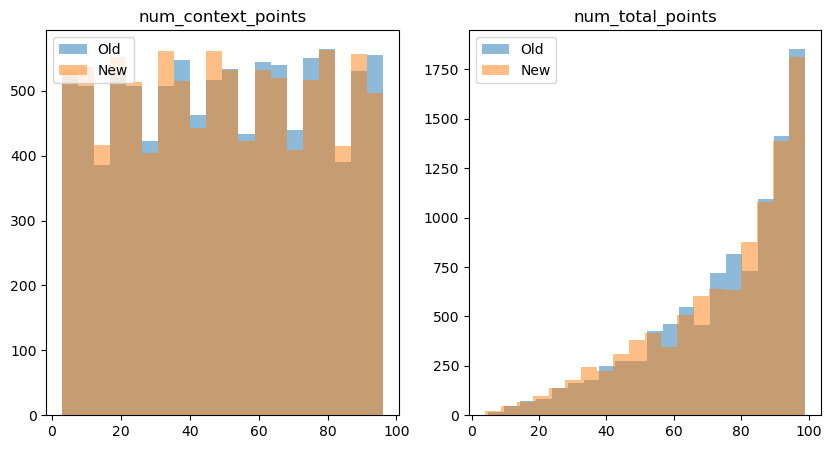

In [6]:
from data.datasets import GPData
from data.gpdata_new import GPData as GPDataNew

dataset = GPData(max_num_context=97)
dataset_new = GPDataNew(max_num_context=97)

for _ in range(10):
    batch = dataset.generate_batch(batch_size=16)
    batch_new = dataset_new.generate_batch(batch_size=16)

    print(f"Old: {batch.num_total_points, batch.num_context_points}")
    print(f"New: {batch_new.num_total_points, batch_new.num_context_points}")

# make a loop to compare the distributions of num_context_points and num_total_points
num_context_points = []
num_total_points = []
num_context_points_new = []
num_total_points_new = []
for _ in range(10000):
    batch = dataset.generate_batch(batch_size=16)
    batch_new = dataset_new.generate_batch(batch_size=16)
    num_context_points.append(batch.num_context_points)
    num_total_points.append(batch.num_total_points)
    num_context_points_new.append(batch_new.num_context_points)
    num_total_points_new.append(batch_new.num_total_points)

# make figure of two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(num_context_points, bins=20, alpha=0.5, label='Old')
ax[0].hist(num_context_points_new, bins=20, alpha=0.5, label='New')
ax[0].set_title('num_context_points')
ax[0].legend()
ax[1].hist(num_total_points, bins=20, alpha=0.5, label='Old')
ax[1].hist(num_total_points_new, bins=20, alpha=0.5, label='New')
ax[1].set_title('num_total_points')
ax[1].legend()
plt.show()

